<a href="https://colab.research.google.com/github/JSJeong-me/GSC_openCV/blob/main/2-openCV/yolo-cv-crop%20-elephants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://github.com/ultralytics/yolov5/issues/36

In [2]:
# pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [3]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-30 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = cv2.imread('elephant2.png')[..., ::-1]

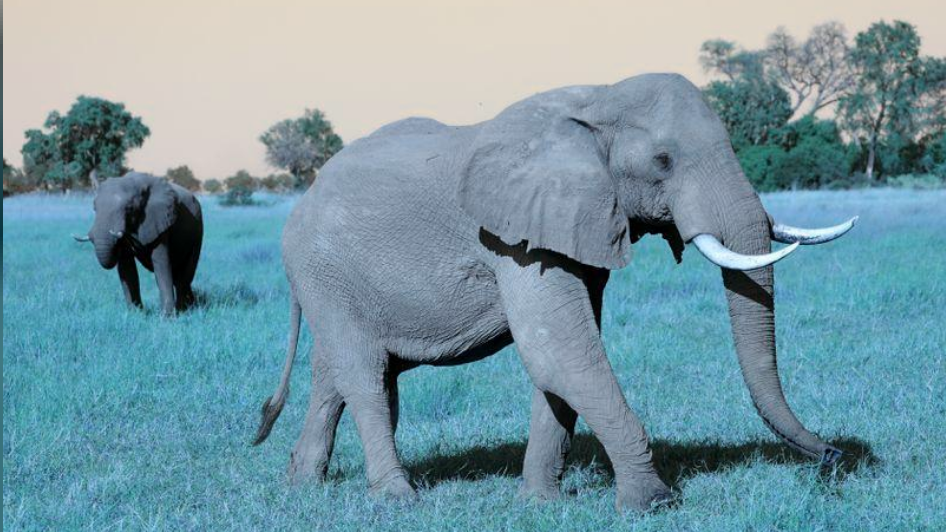

In [6]:
cv2_imshow(img)

In [7]:
model.classes = [20]

In [8]:
# model.conf = 0.6

In [9]:
results = model(img, size = 720)

In [10]:
results.save()

Saved 1 image to runs/detect/exp2


In [ ]:
results.crop(save=True)

In [12]:
elephant01 = results.pandas().xyxy[0]

In [13]:
elephant01

,xmin,ymin,xmax,ymax,confidence,class,name
0,254.591324,70.361763,859.311462,516.046326,0.947537,20,elephant
1,76.865517,170.690201,205.818771,317.721283,0.908322,20,elephant


In [14]:
x1, y1, x2, y2 = int(elephant01.iloc[1,0]), int(elephant01.iloc[1,1]), int(elephant01.iloc[1,2]), int(elephant01.iloc[1,3])

In [15]:
ele01 = img[y1:y2, x1:x2]

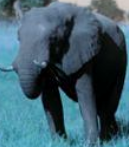

In [16]:
cv2_imshow(ele01)

In [17]:
x1, y1, x2, y2 = int(elephant01.iloc[0,0]), int(elephant01.iloc[0,1]), int(elephant01.iloc[0,2]), int(elephant01.iloc[0,3])

In [20]:
ele02 = img[y1:y2, x1:x2]

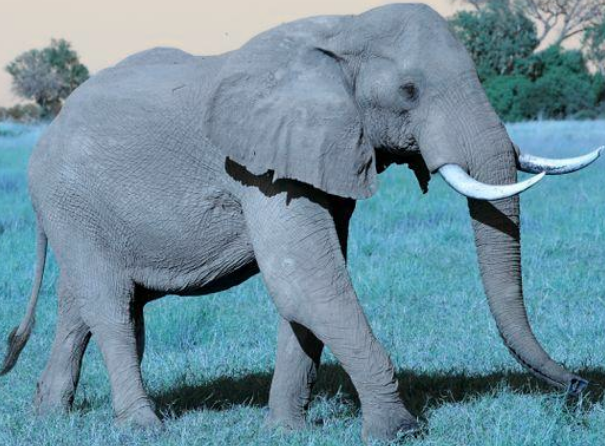

In [21]:
cv2_imshow(ele02)

In [18]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [19]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
#img = './traffic-signal-1.jpg'
img = cv2.imread('./traffic-signal-1.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

img.shape

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-30 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


FileNotFoundError: ignored

In [ ]:
model.conf = 0.25  # confidence threshold (0-1)
model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes =[2, 9]  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

# Inference
results = model(img, size=920)

In [ ]:
from io import BytesIO
from PIL import Image
import base64

In [ ]:
results.imgs # array of original images (as np array) passed to model for inference
results.render()  # updates results.imgs with boxes and labels
for img in results.imgs:
    buffered = BytesIO()
    img_base64 = Image.fromarray(img)
    img_base64.save(buffered, format="JPEG")
    #print(base64.b64encode(buffered.getvalue()).decode('utf-8'))  # base64 encoded image with results

In [ ]:
img_base64

In [ ]:
crops = results.crop(save=True)  # cropped detections dictionary

In [ ]:
no_of_frames = 1  # no_of_frames

In [ ]:
for i in range(no_of_frames):
  print(results.pandas().xyxy[i])

In [ ]:
crops_image = results.pandas().xyxy[no_of_frames-1]

In [ ]:
len(crops_image)

In [ ]:
results.pandas().xyxy[no_of_frames-1]

In [ ]:
results.pandas().xyxy[no_of_frames-1].sort_values('ymin')  # sorted left-right

In [ ]:
target_signal = 4

In [ ]:
crops_image.iloc[target_signal,5] == 9 # Traffic light

In [ ]:
if (crops_image.iloc[target_signal, 5] == 9): # traffic light
  x1, y1, x2, y2 = int(crops_image.iloc[target_signal,0]), int(crops_image.iloc[target_signal,1]), int(crops_image.iloc[target_signal,2]), int(crops_image.iloc[target_signal,3])
  print(x1, y1, x2, y2)
  signal1 = img[y1:y2, x1:x2]
  

In [ ]:
cv2_imshow(signal1)
#cv2.imwrite('./signal-yellow.jpg', signal1)

In [ ]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
#cv2_imshow(result)

H :0  202
S :40  227
V :206  255

In [ ]:
l_h, u_h = 0,202
l_s, u_s = 40, 227
l_v, u_v = 206, 255

l_yellow = np.array([l_h, l_s, l_v])
u_yellow = np.array([u_h, u_s, u_v])

In [ ]:
yellow_mask = cv2.inRange(hsv_frame, l_yellow, u_yellow)
yellow = cv2.bitwise_and(signal1, signal1, mask=yellow_mask)

In [ ]:
cv2_imshow(yellow)

In [ ]:
blur = cv2.medianBlur(yellow,15)

In [ ]:
cv2_imshow(blur)

In [ ]:
kernel = np.ones((12,12),np.uint8)

In [ ]:
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

In [ ]:
cv2_imshow(shaved)